In [1]:
import matplotlib.pyplot as plt
import matplotlib
font = matplotlib.font_manager.FontProperties(fname='SimSun.ttf',size = 10)
import pandas as pd
import json
import numpy as np
import jieba
import os
import wordcloud
from wordcloud import WordCloud

8000 1000


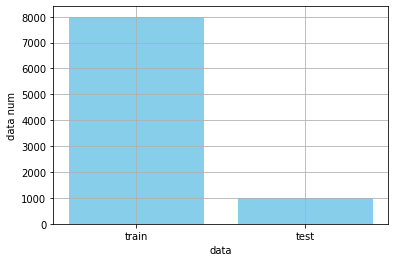

In [6]:
import json

with open('data/testa.json','r') as file:
    content = file.readlines()
    content = [line.strip() for line in content if line.strip()]
    test = [json.loads(line) for line in content]

with open('data/train.json','r') as file:
    content = file.readlines()
    content = [line.strip() for line in content if line.strip()]
    train = [json.loads(line) for line in content]
print(len(train),len(test))

x = ['train','test']
plt.bar(x , [len(train) , len(test)] , color='skyblue')
plt.grid()
plt.xlabel('data')
plt.ylabel('data num')
plt.show()

In [9]:
print(f'训练集合 每个case具体属性查看')
print(train[0].keys())
for k,v in train[0].items():
    print(f'key {k} : {v} \n')

print(f'测试集合 每个case具体属性查看')
print(test[0].keys())
for k,v in test[0].items():
    print(f'key {k} : {v} \n')

训练集合 每个case具体属性查看
dict_keys(['new-ID', 'doc', 'events', 'summarizations'])
key new-ID : 10290 

key doc : 成都市原市长助理门生涉嫌受贿案侦查终结，移送审查起诉_一号专案_澎湃新闻-ThePape。

中新网成都1月5日电，5日，成都市人民检察院官方网站公布了近段时间成都市检察机关查处的4起职务犯罪案件信息。其中，原成都市市长助理、秘书长门生（副厅级）涉嫌受贿一案，由成都市人民检察院侦查终结，移送审查起诉。门生，男，汉族，1959年3月生，四川内江人。2009年门生因抗震救灾有功等原因，兼任成都市市长助理。2013年2月，门生转任成都市市长助理、市政府秘书长，并兼市政府办公厅党组书记，市委党校（行政学院）第一副校（院）长等职迄今。2015年06月10日，成都市纪委发布消息称，经成都市委同意，成都市纪委对成都市市长助理、市政府秘书长门生涉嫌严重违纪违法问题进行立案调查。门生是2014年8月以来，成都继陈争鸣、刘俊林及周鸿德之后落马的第4位市长助理。2015年9月17日，成都市人民检察院依法决定对成都市政府原市长助理、秘书长门生（副厅级）受贿立案侦查。2015年9月25日，经四川省人民检察院决定，依法对门生予以逮捕。此外，成都市检察院还公布了成都武侯区投资促进局副局长岳文婷、成都锦江区三圣街道办事处办公室原主任胡杨、成都市公积金管理中心原党委书记胡旭光的职务犯罪案件信息。 

key events : [{'id': '10290_1', 'content': '门生，2015年9月17日，成都市人民检察院依法决定对成都市政府原市长助理、秘书长门生（副厅级）受贿立案侦查。', 'spans': [{'start': 151, 'end': 154}, {'start': 375, 'end': 427}]}, {'id': '10290_2', 'content': '5日，门生，2015年9月17日，成都市人民检察院依法决定对成都市政府原市长助理、秘书长门生（副厅级）受贿立案侦查。2015年9月25日，经四川省人民检察院决定，依法对门生予以逮捕。', 'spans': [{'start': 58, 'end': 61}, {'start': 151, 'end': 

In [ ]:
# summary文本的长度，即模型输出
from collections import Counter
string_arr = [item['summary'] for item in data]
length_counter = Counter(len(s) for s in string_arr)
lengths, counts = zip(*length_counter.items())
plt.figure(figsize=(8, 6))
plt.bar(lengths, counts, color='skyblue')
average_length = sum(length * count for length, count in length_counter.items()) / sum(counts)
plt.axvline(x=average_length, color='red', linestyle='--', label=f'mean length: {average_length:.2f}')
plt.xlabel('长度',font=font)
plt.ylabel('数量',font=font)
plt.title('文本长度分布',font=font)
plt.legend()
plt.xticks(range(min(lengths), max(lengths)+1, 20))
plt.show()

print(f'文本最短长度 {min(lengths)} 文本最大长度 {max(lengths)}')

In [ ]:
# 统计summary的高频字高频词
string_arr = [item['summary'] for item in data]
# 分词并统计词频
word_counts = Counter()
for string in string_arr:
    seg_list = jieba.cut(string)
    word_counts.update(seg_list)
# 提取前50个高频词及其数量
top_words = word_counts.most_common(50)
words, counts = zip(*top_words)
# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), counts, color='skyblue')
plt.xticks(range(len(words)), words, rotation=90,font=font)
plt.xlabel('词语',font=font)
plt.ylabel('数量',font=font)
plt.title('前50个高频词',font=font)
plt.grid()
plt.show()



In [ ]:
# 统计会议记录的高频词字
string_arr = [item['all_high_word'] for item in data]
# 分词并统计词频
word_counts = Counter()
for string in string_arr:
    seg_list = jieba.cut(string)
    word_counts.update(seg_list)
# 提取前50个高频词及其数量
top_words = word_counts.most_common(50)
words, counts = zip(*top_words)
# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), counts, color='skyblue')
plt.xticks(range(len(words)), words, rotation=90,font=font)
plt.xlabel('词语',font=font)
plt.ylabel('数量',font=font)
plt.title('前50个高频词',font=font)
plt.grid()
plt.show()



In [ ]:
# 绘制summary文本的的词云图
text = []
for item in data:
    tmp = list(jieba.cut(item['summary']))
    tmp = [w for w in tmp if len(w)>1]
    text.extend(tmp)

text = '\n'.join(text)
wc = WordCloud(font_path='SimSun.ttf',background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
# plt.savefig('wordcloud.jpg') # 保存图片
plt.axis("off")
plt.show()

In [ ]:
# 绘制会议记录的文本的的词云图
text = []
for item in data:
    tmp = list(jieba.cut(item['all_high_word']))
    tmp = [w for w in tmp if len(w)>1]
    text.extend(tmp)

text = '\n'.join(text)
wc = WordCloud(font_path='SimSun.ttf',background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
# plt.savefig('wordcloud.jpg') # 保存图片
plt.axis("off")
plt.show()